In [61]:
import numpy as np
import pandas as pd

df=pd.read_csv("C:/Users/ritti/Downloads/internal_skill_stuff/Edulyt_Internship/project_3/credit_banking_new.csv")
df

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date
0,4595.0,534,SHOES,New,RKFCM,"$1,484.74","$1,471.74",BN710,26/08/2014,17:16:17,3109172,547836726,Peninsula Beauty,YE5901,Prepaid card,30462,0,NaN
1,6679.0,396,LUGGAGE,New,TNVON,"$1,452.50","$1,442.50",KF815,26/01/2014,15:40:52,7583605,279617132,DODOcase,UW7354,Mobile carrier Billing,37927,0,NaN
2,7075.0,449,SHOES,Refurbished,VKKEA,"$4,308.02","$4,284.02",UG960,03/01/2014,01:29:05,9985192,633765867,Staples,VN6656,Credit card,80640,0,NaN
3,1418.0,145,BEDDING,New,PIUEM,"$3,272.59","$3,249.59",DK471,30/05/2014,09:10:00,7720605,734500382,Road Runner Sports,MS6579,Prepaid card,58692,0,NaN
4,6740.0,844,ELECTRONICS,Used,FMBZC,$628.67,$608.67,OJ311,14/08/2014,05:31:30,8367528,241944637,L'Occitane,GN3944,Debit card,21505,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,8609.0,470,APPLIANCES,New,TTNTN,"$1,187.85","$1,187.85",FL494,09/08/2014,18:09:03,7482917,337083364,Cole Hardware,EX7729,Credit card,17306,0,NaN
9995,9725.0,406,CLOTHING,Used,ONKHS,"$2,202.20","$2,202.20",DP660,02/11/2014,12:31:20,6749808,354170741,Cole Hardware,EX7730,Prepaid card,41829,0,NaN
9996,1548.0,694,ELECTRONICS,New,AGSDS,"$3,123.80","$3,079.80",VI354,09/02/2014,20:06:24,7644170,101023606,Barnes & Noble,EY1659,Mobile carrier Billing,34577,0,NaN
9997,4878.0,552,SHOES,New,RKFCM,"$1,257.44","$1,227.44",UQ360,17/01/2014,12:14:24,8336204,320092897,Gymboree,ZF8986,Mobile carrier Billing,43458,0,NaN


## scheck-1

In [62]:
# Replace NaN values with a new unique ID
df['Credit_card'].fillna('No Credit Card', inplace=True)

# If the missing values are not NaNs but some other placeholder value (like 'Unknown'):
# df['Credit_card'].replace('Unknown', 'No Credit Card', inplace=True)
df.to_csv("scheck_1.csv",index=False)

C:\Users\ritti\AppData\Local\Temp/ipykernel_4300/2939332830.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_card'].fillna('No Credit Card', inplace=True)
C:\Users\ritti\AppData\Local\Temp/ipykernel_4300/2939332830.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Credit Card' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Credit_card'].fillna('No Credit Card', inplace=True)


In [63]:
df.columns = df.columns.str.strip()


## scheck-2

In [64]:
# Convert 'Selling_price' to numeric, invalid parsing will be set as NaN
df['Selling_price'] = pd.to_numeric(df['Selling_price'], errors='coerce')

# Now try the discount application code again
discount_condition = (df['Price'] == df['Selling_price']) & (df['Coupon_ID'].notna())
df.loc[discount_condition, 'Selling_price'] = df.loc[discount_condition, 'Selling_price'] * 0.95
# Save DataFrame to CSV after operation
df.to_csv('scheck_2.csv', index=False)


## scheck-3

In [65]:
# Convert 'Date' and 'Return_date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Return_date'] = pd.to_datetime(df['Return_date'], dayfirst=True)

# Check if 'Return_date' is later than 'Date'
invalid_returns = df[df['Return_date'] <= df['Date']]

# If there are any invalid returns, handle them (e.g., remove them or set 'Return_date' to NaN)
if not invalid_returns.empty:
    print(f"Found {len(invalid_returns)} invalid returns. Handling them now.")
    df.loc[invalid_returns.index, 'Return_date'] = pd.NaT


Found 25 invalid returns. Handling them now.


## scheck-4

In [66]:
# Identify rows where Coupon ID is NULL
no_coupon = df['Coupon_ID'].isna()

# Set 'Selling_price' equal to 'Price' for those entries
df.loc[no_coupon, 'Selling_price'] = df.loc[no_coupon, 'Price']
df.to_csv('scheck_4.csv', index=False)


C:\Users\ritti\AppData\Local\Temp/ipykernel_4300/3119689728.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['$3,788.97 ' '$3,697.22 ' '$379.49 ' '$623.05 ' '$2,213.77 ' '$2,280.16 '
 '$635.56 ' '$1,050.51 ' '$3,205.26 ' '$2,455.58 ' '$3,631.77 '
 '$1,680.33 ' '$1,363.08 ' '$379.56 ' '$2,132.96 ' '$298.03 ' '$2,868.97 '
 '$4,641.79 ' '$2,230.61 ' '$4,802.17 ']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[no_coupon, 'Selling_price'] = df.loc[no_coupon, 'Price']


## scheck-5

In [67]:
# Load the second dataset from the Excel file
df2 = pd.read_csv("C:/Users/ritti/Downloads/internal_skill_stuff/Edulyt_Internship/project_3/credit_banking_new2.csv")

# Now you can access the 'Age' column
underage = df2['Age'] <= 18

# Handle underage CC holders
if underage.any():
    print(f"Found {underage.sum()} underage CC holders. Handling them now.")
    df2.loc[underage, 'Age'] = pd.NaT

    
df2.to_csv('scheck_5.csv', index=False)


Found 13 underage CC holders. Handling them now.


C:\Users\ritti\AppData\Local\Temp/ipykernel_4300/963556428.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NaT' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[underage, 'Age'] = pd.NaT


## scheck-6

In [87]:

# Check if 'Transaction ID' is unique
if df['Transaction ID'].is_unique:
    print("Transaction ID is unique for all entries.")
else:
    print("Transaction ID is not unique. Duplicates exist.")

# If you want to remove duplicates based on 'Transaction ID'
df_unique = df.drop_duplicates(subset='Transaction ID', keep='first')

# Save the dataframe with unique Transaction ID to a new CSV file
df_unique.to_csv('your_file_unique.csv', index=False)


Transaction ID is not unique. Duplicates exist.


# Task

## Task-1

In [69]:
# Assuming df2 is your DataFrame

# Remove rows with missing 'Age' values
df2 = df2.dropna(subset=['Age'])

# Define age groups
bins = [0, 35, 55, df2['Age'].max()]
labels = ['Young', 'Mid age', 'Old']
df2['Age_group'] = pd.cut(df2['Age'], bins=bins, labels=labels)

# Convert 'Age_group' to string type
df2['Age_group'] = df2['Age_group'].astype(str)

# Define segments based on gender and age group
df2['Segment'] = df2['Gender'] + ' ' + df2['Age_group']

# Print the number of customers in each segment
print(df2['Segment'].value_counts())
(df2['Segment'].value_counts()).to_csv("Task_1.csv")

Segment
F Old        59
M Old        55
F Young      23
M Young      21
F Mid age    15
M Mid age    12
Name: count, dtype: int64


## Task-2

In [70]:
import pandas as pd
import numpy as np

# Load the transaction data
df_transaction = pd.read_csv("C:/Users/ritti/Downloads/internal_skill_stuff/Edulyt_Internship/project_3/credit_banking_new.csv")

# Load the customer data
df_customer = pd.read_csv("C:/Users/ritti/Downloads/internal_skill_stuff/Edulyt_Internship/project_3/credit_banking_new2.csv")

# Remove leading and trailing spaces in column names
df_transaction.columns = df_transaction.columns.str.strip()
df_customer.columns = df_customer.columns.str.strip()

# Replace non-finite values in 'Credit_card' with 0 and convert to int
df_transaction['Credit_card'] = df_transaction['Credit_card'].replace(np.nan, 0).astype(int)

# Convert 'C_ID' in customer data to int
df_customer['C_ID'] = df_customer['C_ID'].astype(int)

# Merge the two dataframes on 'C_ID' and 'Credit_card'
df = pd.merge(df_transaction, df_customer, left_on='Credit_card', right_on='C_ID')

# Calculate total spend for each Product
product_spend = df.groupby('P_CATEGORY')['Selling_price'].sum()

# Calculate total spend for each State
state_spend = df.groupby('State')['Selling_price'].sum()

# Calculate total spend for each Payment Method
payment_spend = df.groupby('Payment Method')['Selling_price'].sum()

print("Total spend by product:\n", product_spend)
print("\nTotal spend by state:\n", state_spend)
print("\nTotal spend by payment method:\n", payment_spend)


Total spend by product:
 P_CATEGORY
APPLIANCES          $4,891.58 $2,085.85 $2,109.85 $2,017.24 $2,028...
BABY CLOTHING       $3,918.19 $4,633.93 $3,297.99 $4,609.93 $2,009...
BABY TOYS           $289.49 $3,499.43 $334.28 $1,598.58 $3,093.36 ...
BEDDING             $3,249.59 $1,955.83 $3,710.01 $3,527.28 $1,957...
CLOTHING            $3,704.69 $2,181.20 $887.56 $358.59 $1,025.81 ...
COMPUTERS           $2,827.97 $846.57 $2,836.97 $1,337.08 $4,069.4...
DECOR               $974.49 $4,943.44 $2,636.83 $4,932.73 $390.77 ...
ELECTRONICS         $608.67 $2,802.51 $4,172.69 $3,607.22 $2,784.5...
GAMES               $2,383.99 $2,403.99 $711.39 $4,134.59 $2,446.8...
KITCHEN & DINING    $3,984.79 $4,007.79 $4,171.27 $94.43 $2,123.77...
LUGGAGE             $1,442.50 $3,698.97 $4,764.25 $1,439.50 $376.7...
OFFICE SUPPLIES     $1,001.90 $2,167.71 $2,490.31 $4,652.60 $3,103...
SHOES               $1,471.74 $4,284.02 $3,434.72 $1,257.44 $2,262...
Name: Selling_price, dtype: object

Total spend by sta

In [71]:
# Add a new column to each dataframe to describe the data
df_product_spend['Category'] = 'Product'
df_state_spend['Category'] = 'State'
df_payment_spend['Category'] = 'Payment Method'

# Rename the columns for merging
df_product_spend.columns = ['Type', 'Spend', 'Category']
df_state_spend.columns = ['Type', 'Spend', 'Category']
df_payment_spend.columns = ['Type', 'Spend', 'Category']

# Concatenate the dataframes
df_total_spend = pd.concat([df_product_spend, df_state_spend, df_payment_spend])

# Save the dataframe to a CSV file
df_total_spend.to_csv('Task_2.csv', index=False)


## Task-3

In [72]:
# Remove rows with missing 'Age' values
df = df.dropna(subset=['Age'])

# Define age groups
bins = [0, 35, 55, df['Age'].max()]
labels = ['Young', 'Mid age', 'Old']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Convert 'Age_group' to string type
df['Age_group'] = df['Age_group'].astype(str)

# Define segments based on gender and age group
df['Segment'] = df['Gender'] + ' ' + df['Age_group']


In [73]:
# Calculate total spend for each Segment
segment_spend = df.groupby('Segment')['Selling_price'].sum()

print("Total spend by segment:\n", segment_spend)
segment_spend.to_csv("Task_3.csv")

Total spend by segment:
 Segment
F Mid age    $608.67 $1,001.90 $4,943.44 $376.74 $1,257.44 ...
F Old        $1,442.50 $3,918.19 $2,383.99 $3,984.79 $2,403...
F Young      $974.49 $3,607.22 $3,704.69 $887.56 $1,025.81 ...
M Mid age    $4,891.58 $1,439.50 $3,434.72 $4,007.79 $4,069...
M Old        $1,471.74 $4,284.02 $3,698.97 $2,827.97 $846.5...
M Young      $3,249.59 $2,802.51 $4,764.25 $4,172.69 $3,297...
Name: Selling_price, dtype: object


## Task-4

In [76]:
merged_df = pd.merge(df, df2, left_on='Credit_card', right_on='C_ID')


In [77]:
merged_df['Return_ind'] = merged_df['Return_ind'].astype(bool)


In [78]:
merged_df['Price'] = pd.to_numeric(merged_df['Price'].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')
merged_df['Selling_price'] = pd.to_numeric(merged_df['Selling_price'].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')


In [79]:
# Now you can calculate 'Discount'
merged_df['Discount'] = merged_df['Price'] - merged_df['Selling_price']


In [80]:


# Convert 'Return_ind' to boolean
merged_df['Return_ind'] = merged_df['Return_ind'].astype(bool)

# Analyze returns by state
returns_by_state = merged_df[merged_df['Return_ind']].groupby('State_x').size()

# Analyze returns by age group
bins = [0, 35, 55, merged_df['Age_x'].max()]
labels = ['Young', 'Mid age', 'Old']
merged_df['Age_group'] = pd.cut(merged_df['Age_x'], bins=bins, labels=labels)
returns_by_age_group = merged_df[merged_df['Return_ind']].groupby('Age_group').size()

# Analyze returns by condition
returns_by_condition = merged_df[merged_df['Return_ind']].groupby('CONDTION').size()

# Analyze returns by product category
returns_by_category = merged_df[merged_df['Return_ind']].groupby('P_CATEGORY').size()

# Analyze returns by discount
merged_df['Discount'] = merged_df['Price'] - merged_df['Selling_price']
returns_by_discount = merged_df[merged_df['Return_ind']].groupby('Discount').size()

print("Returns by state:\n", returns_by_state)
print("\nReturns by age group:\n", returns_by_age_group)
print("\nReturns by condition:\n", returns_by_condition)
print("\nReturns by product category:\n", returns_by_category)
print("\nReturns by discount:\n", returns_by_discount)


Returns by state:
 State_x
Arizona           94
California       404
Illinois         122
Kentucky         111
Massachusetts    110
Missouri          48
Nevada            89
Ohio              54
Texas            267
Washington       120
dtype: int64

Returns by age group:
 Age_group
Young      328
Mid age    178
Old        913
dtype: int64

Returns by condition:
 CONDTION
New            661
Refurbished    362
Used           396
dtype: int64

Returns by product category:
 P_CATEGORY
APPLIANCES           83
BABY CLOTHING        66
BABY TOYS            56
BEDDING              77
CLOTHING            110
COMPUTERS           160
DECOR               175
ELECTRONICS         146
GAMES               105
KITCHEN & DINING    112
LUGGAGE              87
OFFICE SUPPLIES     112
SHOES               130
dtype: int64

Returns by discount:
 Discount
0.0     26
10.0    27
11.0    27
12.0    35
13.0    36
14.0    27
15.0    36
16.0     1
16.0    34
17.0    31
18.0    39
19.0    37
20.0    37
21.0    31
22

C:\Users\ritti\AppData\Local\Temp/ipykernel_4300/153477111.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  returns_by_age_group = merged_df[merged_df['Return_ind']].groupby('Age_group').size()


From the output, we can make the following observations:

### Returns by state: The state with the highest number of returns is California (404 returns), followed by Texas (267 returns) and Washington (120 returns). This could indicate that customers in these states are more likely to return products, or it could simply reflect a higher volume of sales in these states.

### Returns by age group: The age group with the highest number of returns is ‘Old’ (913 returns), followed by ‘Young’ (328 returns) and ‘Mid age’ (178 returns). This suggests that older customers are more likely to return products.
### Returns by condition: Products that are ‘New’ have the highest number of returns (661 returns), followed by ‘Used’ (396 returns) and ‘Refurbished’ (362 returns). This could indicate that customers are more likely to return new products, possibly because they have higher expectations for these products.

### Returns by product category: The product categories with the highest number of returns are ‘CLOTHING’ (110 returns), ‘COMPUTERS’ (160 returns), and ‘DECOR’ (175 returns). This could suggest that these product categories are more likely to have returns, possibly due to size, fit, or personal preference issues.

### Returns by discount: The discount amounts with the highest number of returns are 0.0 (26 returns), 10.0 (27 returns), and 26.0 (58 returns). This suggests that the amount of discount does not have a significant impact on the likelihood of a product being returned.

These are just preliminary observations and would need further analysis to draw more concrete conclusions. For example, it would be useful to look at the return rates (i.e., the number of returns divided by the total number of sales) for each category, as this would give a more accurate picture of the likelihood of returns. It’s also important to consider other factors that could be influencing these results, such as the volume of sales in each category.

## Task-5

In [81]:
import pandas as pd

# Convert 'Date' and 'Time' to datetime type
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract hour from 'Datetime'
df['Hour'] = df['Datetime'].dt.hour

# Define time periods
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a new column 'Time_Period'
df['Time_Period'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False)

# Analyze orders by time period
time_period_orders = df['Time_Period'].value_counts().sort_index()

print("Number of orders by time period:\n", time_period_orders)


Number of orders by time period:
 Time_Period
Night        2362
Morning      2590
Afternoon    2477
Evening      2565
Name: count, dtype: int64


C:\Users\ritti\AppData\Local\Temp/ipykernel_4300/2359735307.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


## Task-6

In [82]:
# Remove dollar sign, commas, and convert to float
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Handle parentheses for negative numbers, remove dollar sign, commas, and convert to float
df['Selling_price'] = df['Selling_price'].replace({'\$': '', ',': '', '\(': '-', '\)': ''}, regex=True).astype(float)

# Calculate discount
df['Discount'] = df['Price'] - df['Selling_price']

# Calculate total discount for each payment method
discount_by_payment = df.groupby('Payment Method')['Discount'].sum().sort_values(ascending=False)

print("Total discount by payment method:\n", discount_by_payment)


Total discount by payment method:
 Payment Method
Mobile carrier Billing    123424.0
Credit card               112034.0
Prepaid card               47140.0
Debit card                  9178.0
Paypal wallet               2471.0
Deirect debits              2429.0
Gift card                   1777.0
Name: Discount, dtype: float64


## Task-7

In [83]:
import pandas as pd

# Assuming df is your DataFrame and 'Selling_price' is the column with the prices
df['Value'] = ['High' if price > 1000 else 'Low' for price in df['Selling_price']]

# Now, we can group by the 'Value' column and count the number of orders for each group
profile = df.groupby('Value').size()

print(profile)


Value
High    7971
Low     2023
dtype: int64


## Task-8

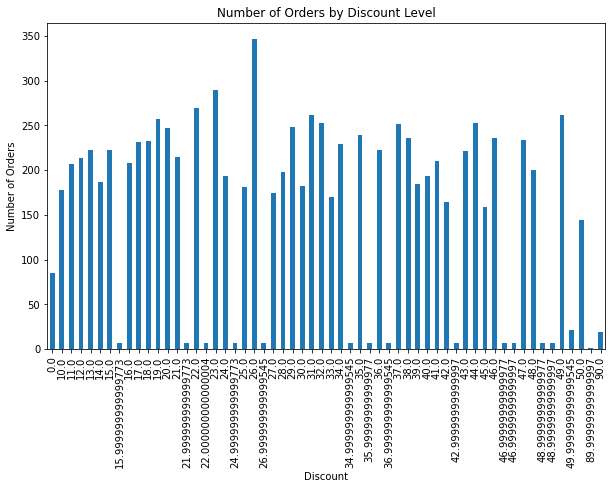

In [86]:
 
import matplotlib.pyplot as plt

# Calculate the number of orders for each discount level
orders_by_discount = merged_df.groupby('Discount')['Transaction ID'].count()

# Plot the result
plt.figure(figsize=(10, 6))
orders_by_discount.plot(kind='bar')
plt.xlabel('Discount')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Discount Level')
plt.show()


In [99]:
correlation = merged_df['Discount'].corr(merged_df['Transaction ID'])
print("Correlation between discount level and number of orders: ", correlation)


Correlation between discount level and number of orders:  -0.013016665223192975


From the graph, it appears that the number of orders varies across different discount levels. However, without a clear view of the x-axis (discount levels), it’s hard to draw a definitive conclusion about the relationship between discount level and the number of orders.

If there’s a general upward trend as the discount increases, it could suggest that higher discounts lead to an increase in the number of orders. However, other factors could also be influencing this trend, such as the type of products being discounted, the time of year, etc.